In [2]:
# standard imports

# print everything
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys
print('python:', sys.version_info[:3])

import numpy as np
print('numpy:', np.__version__)

import pandas as pd
print('pandas:', pd.__version__)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
print('seaborn:', sns.__version__)
plt.style.use('ggplot')


python: (3, 7, 3)
numpy: 1.16.4
pandas: 0.24.2
seaborn: 0.9.0


Data collected from *Box Office Mojo*: 

https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2010&p=.htm

shows **3387** movie *titles* from *2010* to *2018*
with **3359** doemstic gross values and **2032** foreign gross values.

In [3]:
#importing the dataframe from box office mojo
bom_movie_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()
bom_movie_gross_df.info()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


since the tn_movie_budgets_df has production budget, we will use that data set instead. 

# 2. IMDB Data

Data gathered from [IMDB](https://www.imdb.com/interfaces/)

## name values like actor/director to be taken out from this dataset

**name.basics.tsv.gz** – Contains the following information for names:
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

In [4]:
pd.read_csv('data/imdb.name.basics.csv.gz').head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


**title.akas.tsv.gz** - Contains the following information for titles:

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

In [5]:
#checking the dataframe, won't be using this one
pd.read_csv('data/imdb.title.akas.csv.gz').head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


## Genre & title name info to be merged from this dataframe
**title.basics.tsv.gz** - Contains the following information for titles:
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

In [6]:
pd.read_csv('data/imdb.title.basics.csv.gz').head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
imdb_title_basics_df = pd.read_csv('data/imdb.title.basics.csv.gz', 
                                   usecols = ['tconst', 
                                              'original_title', 
                                              'start_year', 
                                             'genres'])
imdb_title_basics_df.head()
imdb_title_basics_df.info()

,tconst,original_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
tconst            146144 non-null object
original_title    146123 non-null object
start_year        146144 non-null int64
genres            140736 non-null object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
#to get a list of all mentioned genres
all_genres = set()
genre_series = imdb_title_basics_df.genres

for row in genre_series:
    try:
        for genre in row.split(','):
            all_genres.add(genre)
    except:
        continue
all_genres = list(all_genres)

#created separate columns for the genres
for genre in all_genres:
    imdb_title_basics_df[genre] = imdb_title_basics_df.genres.apply(lambda x: genre in str(x).split(','))

imdb_title_basics_df.columns
imdb_title_basics_df.head()

Index(['tconst', 'original_title', 'start_year', 'genres', 'Animation',
       'Sci-Fi', 'Game-Show', 'Fantasy', 'Western', 'Adult', 'News',
       'Reality-TV', 'Biography', 'Drama', 'Romance', 'History', 'War',
       'Crime', 'Mystery', 'Musical', 'Music', 'Adventure', 'Documentary',
       'Short', 'Talk-Show', 'Comedy', 'Action', 'Sport', 'Thriller', 'Horror',
       'Family'],
      dtype='object')

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Adventure,Documentary,Short,Talk-Show,Comedy,Action,Sport,Thriller,Horror,Family
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,Drama,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


## director and writer info to be extracted from this one

**title.crew.tsv.gz** – Contains the director and writer information for all the titles in IMDb. 

Fields include:
- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

In [9]:
pd.read_csv('data/imdb.title.crew.csv.gz').head()
pd.read_csv('data/imdb.title.crew.csv.gz').info()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


**title.principals.tsv.gz** – Contains the principal cast/crew for titles
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

In [10]:
pd.read_csv('data/imdb.title.principals.csv.gz').head()
pd.read_csv('data/imdb.title.principals.csv.gz').info()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [11]:
imdb_title_principals_df = pd.read_csv('data/imdb.title.principals.csv.gz', 
                                       usecols = ['tconst', 
                                                  'nconst', 
                                                  'category'])


In [12]:
imdb_title_principals_df.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


**title.ratings.tsv.gz** – Contains the IMDb rating and votes information for titles
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

In [13]:
pd.read_csv('data/imdb.title.ratings.csv.gz').head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [14]:
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
#creating the master imdb dataframe via tconst. values in title.basics, title.ratings



In [16]:
imdb_review_genres_df = pd.merge(imdb_title_basics_df, imdb_title_ratings, 
             left_on = 'tconst', 
             right_on = 'tconst',
             how = 'inner')

In [17]:
imdb_title_basics_df.info()
print('\n')
imdb_title_ratings.info()
imdb_review_genres_df.head()
imdb_review_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 31 columns):
tconst            146144 non-null object
original_title    146123 non-null object
start_year        146144 non-null int64
genres            140736 non-null object
Animation         146144 non-null bool
Sci-Fi            146144 non-null bool
Game-Show         146144 non-null bool
Fantasy           146144 non-null bool
Western           146144 non-null bool
Adult             146144 non-null bool
News              146144 non-null bool
Reality-TV        146144 non-null bool
Biography         146144 non-null bool
Drama             146144 non-null bool
Romance           146144 non-null bool
History           146144 non-null bool
War               146144 non-null bool
Crime             146144 non-null bool
Mystery           146144 non-null bool
Musical           146144 non-null bool
Music             146144 non-null bool
Adventure         146144 non-null bool
Documentary       146144

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Short,Talk-Show,Comedy,Action,Sport,Thriller,Horror,Family,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,6.1,13
4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,6.5,119


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 33 columns):
tconst            73856 non-null object
original_title    73856 non-null object
start_year        73856 non-null int64
genres            73052 non-null object
Animation         73856 non-null bool
Sci-Fi            73856 non-null bool
Game-Show         73856 non-null bool
Fantasy           73856 non-null bool
Western           73856 non-null bool
Adult             73856 non-null bool
News              73856 non-null bool
Reality-TV        73856 non-null bool
Biography         73856 non-null bool
Drama             73856 non-null bool
Romance           73856 non-null bool
History           73856 non-null bool
War               73856 non-null bool
Crime             73856 non-null bool
Mystery           73856 non-null bool
Musical           73856 non-null bool
Music             73856 non-null bool
Adventure         73856 non-null bool
Documentary       73856 non-null bool
Short     

# Rotten Tomatoes Data
Data is gathered from [Kaggle](https://www.kaggle.com/rpnuser8182/rotten-tomatoes)

**rt.movie_info.tsv.gz** - Contains basic information about movies from rotten tomatoes:

- idtable - key: a primary key that can be used to join with the reviews file.
- synopsis - synopsis of the movie
- rating - Rotten Tomatoes rating for the movie
- genre - genre(s)
- director - director(s)
- writer - writers(s)
- theater_datedate - released to theaters
- dvd_datedate - released to dvd
- currency - currency of the box office value
- box_office - box office earnings
- runtime - minutes of runtime
- studio - production studio

In [18]:
pd.read_csv('data/rt.movie_info.tsv.gz', sep = '\t').head(100)
pd.read_csv('data/rt.movie_info.tsv.gz', sep = '\t').info()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.3+ KB


**rt.movie_info.tsv.gz** - Contains basic information about movie reviews from rotten tomatoes:

- id: table foreign key; used to join with movie_info.tsv
- reviews: text of critic reviews
- rating: rating
- fresh: freshness of review - fresh or rotten
- critic: critic name
- top_critic: if critic is considered a 'top critic' 1 or 0
- publisher: publisher or review
- date: date of review

In [19]:
pd.read_csv('data/rt.reviews.tsv.gz', sep = '\t', encoding='latin-1').head()
pd.read_csv('data/rt.reviews.tsv.gz', sep = '\t', encoding='latin-1').info()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [20]:
pd.read_csv('data/tmdb.movies.csv.gz').head()
pd.read_csv('data/tmdb.movies.csv.gz').info()
#we can use popularity

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
pd.read_csv('data/tn.movie_budgets.csv.gz').head()
pd.read_csv('data/tn.movie_budgets.csv.gz').info()
tn_movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [22]:
def convert_to_numeric(some_object):
    '''This function converts formatted numbers 
     with $ sign and thousand separaters to integers.'''
    return int(some_object.lstrip('$').replace(',',''))

#convert formatted numbers to numeric values
tn_movie_budgets_df.iloc[:, 3:] = tn_movie_budgets_df.iloc[:, 3:].applymap(convert_to_numeric)
#remove id column
tn_movie_budgets_df.drop('id', inplace=True, axis=1)
#keep only the year from the release_date column
tn_movie_budgets_df['year'] = tn_movie_budgets_df.release_date.apply(lambda x: x[-4:]).astype(int)
tn_movie_budgets_df.drop('release_date', inplace=True, axis=1)
tn_movie_budgets_df.head()
tn_movie_budgets_df.info()

,movie,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,425000000,760507625,2776345279,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year                 5782 non-null int64
dtypes: int64(4), object(1)
memory usage: 225.9+ KB


In [23]:
genre_financial_df = pd.merge(imdb_title_basics_df, tn_movie_budgets_df, 
         left_on = 'original_title', 
        right_on = 'movie', 
        how = 'inner')

In [24]:
genre_financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 36 columns):
tconst               3537 non-null object
original_title       3537 non-null object
start_year           3537 non-null int64
genres               3473 non-null object
Animation            3537 non-null bool
Sci-Fi               3537 non-null bool
Game-Show            3537 non-null bool
Fantasy              3537 non-null bool
Western              3537 non-null bool
Adult                3537 non-null bool
News                 3537 non-null bool
Reality-TV           3537 non-null bool
Biography            3537 non-null bool
Drama                3537 non-null bool
Romance              3537 non-null bool
History              3537 non-null bool
War                  3537 non-null bool
Crime                3537 non-null bool
Mystery              3537 non-null bool
Musical              3537 non-null bool
Music                3537 non-null bool
Adventure            3537 non-null bool
Docume

In [25]:
genre_financial_df = genre_financial_df.loc[(genre_financial_df.year > 2009) & #filtering out movies for 2010-2018
                                            (genre_financial_df.year <2019)]

In [26]:
genre_financial_df.head()
genre_financial_df.info()

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Action,Sport,Thriller,Horror,Family,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",True,False,False,False,False,False,...,True,False,False,False,False,Foodfight!,45000000,0,73706,2012
2,tt0326592,The Overnight,2010,NaN,False,False,False,False,False,False,...,False,False,False,False,False,The Overnight,200000,1109808,1165996,2015
3,tt3844362,The Overnight,2015,"Comedy,Mystery",False,False,False,False,False,False,...,False,False,False,False,False,The Overnight,200000,1109808,1165996,2015
4,tt0337692,On the Road,2012,"Adventure,Drama,Romance",False,False,False,False,False,False,...,False,False,False,False,False,On the Road,25000000,720828,9313302,2013
5,tt2404548,On the Road,2011,Drama,False,False,False,False,False,False,...,False,False,False,False,False,On the Road,25000000,720828,9313302,2013


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2442 entries, 0 to 3516
Data columns (total 36 columns):
tconst               2442 non-null object
original_title       2442 non-null object
start_year           2442 non-null int64
genres               2415 non-null object
Animation            2442 non-null bool
Sci-Fi               2442 non-null bool
Game-Show            2442 non-null bool
Fantasy              2442 non-null bool
Western              2442 non-null bool
Adult                2442 non-null bool
News                 2442 non-null bool
Reality-TV           2442 non-null bool
Biography            2442 non-null bool
Drama                2442 non-null bool
Romance              2442 non-null bool
History              2442 non-null bool
War                  2442 non-null bool
Crime                2442 non-null bool
Mystery              2442 non-null bool
Musical              2442 non-null bool
Music                2442 non-null bool
Adventure            2442 non-null bool
Docume

In [27]:
# using the year and the start year to filter out duplicate movies in different years and use one
genre_financial_df = genre_financial_df.loc[genre_financial_df.year == genre_financial_df.start_year] 

In [28]:
genre_financial_df.head(200)
genre_financial_df.info()

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Action,Sport,Thriller,Horror,Family,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",True,False,False,False,False,False,...,True,False,False,False,False,Foodfight!,45000000,0,73706,2012
3,tt3844362,The Overnight,2015,"Comedy,Mystery",False,False,False,False,False,False,...,False,False,False,False,False,The Overnight,200000,1109808,1165996,2015
6,tt3872966,On the Road,2013,Documentary,False,False,False,False,False,False,...,False,False,False,False,False,On the Road,25000000,720828,9313302,2013
10,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",False,False,False,False,False,False,...,False,False,False,False,False,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013
11,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",False,False,False,False,False,False,...,True,False,False,False,False,A Walk Among the Tombstones,28000000,26017685,62108587,2014
12,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",False,True,False,False,False,False,...,True,False,False,False,False,Jurassic World,215000000,652270625,1648854864,2015
13,tt0376136,The Rum Diary,2011,"Comedy,Drama",False,False,False,False,False,False,...,False,False,False,False,False,The Rum Diary,45000000,13109815,21544732,2011
14,tt0383010,The Three Stooges,2012,"Comedy,Family",False,False,False,False,False,False,...,False,False,False,False,True,The Three Stooges,30000000,44338224,54052249,2012
16,tt0393049,Anderson's Cross,2010,"Comedy,Drama,Romance",False,False,False,False,False,False,...,False,False,False,False,False,Anderson's Cross,300000,0,0,2010
17,tt0398286,Tangled,2010,"Adventure,Animation,Comedy",True,False,False,False,False,False,...,False,False,False,False,False,Tangled,260000000,200821936,586477240,2010


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 3506
Data columns (total 36 columns):
tconst               1491 non-null object
original_title       1491 non-null object
start_year           1491 non-null int64
genres               1487 non-null object
Animation            1491 non-null bool
Sci-Fi               1491 non-null bool
Game-Show            1491 non-null bool
Fantasy              1491 non-null bool
Western              1491 non-null bool
Adult                1491 non-null bool
News                 1491 non-null bool
Reality-TV           1491 non-null bool
Biography            1491 non-null bool
Drama                1491 non-null bool
Romance              1491 non-null bool
History              1491 non-null bool
War                  1491 non-null bool
Crime                1491 non-null bool
Mystery              1491 non-null bool
Musical              1491 non-null bool
Music                1491 non-null bool
Adventure            1491 non-null bool
Docume

In [29]:
genre_financial_df.genres.isna().sum() #finding the none values

4

In [30]:
genre_financial_df.dropna(subset = ['genres'], inplace = True)

In [31]:
genre_financial_df = genre_financial_df.loc[(genre_financial_df.worldwide_gross != 0)]

In [32]:
genre_financial_df.head(100)

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Action,Sport,Thriller,Horror,Family,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",True,False,False,False,False,False,...,True,False,False,False,False,Foodfight!,45000000,0,73706,2012
3,tt3844362,The Overnight,2015,"Comedy,Mystery",False,False,False,False,False,False,...,False,False,False,False,False,The Overnight,200000,1109808,1165996,2015
6,tt3872966,On the Road,2013,Documentary,False,False,False,False,False,False,...,False,False,False,False,False,On the Road,25000000,720828,9313302,2013
10,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",False,False,False,False,False,False,...,False,False,False,False,False,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013
11,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",False,False,False,False,False,False,...,True,False,False,False,False,A Walk Among the Tombstones,28000000,26017685,62108587,2014
12,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",False,True,False,False,False,False,...,True,False,False,False,False,Jurassic World,215000000,652270625,1648854864,2015
13,tt0376136,The Rum Diary,2011,"Comedy,Drama",False,False,False,False,False,False,...,False,False,False,False,False,The Rum Diary,45000000,13109815,21544732,2011
14,tt0383010,The Three Stooges,2012,"Comedy,Family",False,False,False,False,False,False,...,False,False,False,False,True,The Three Stooges,30000000,44338224,54052249,2012
17,tt0398286,Tangled,2010,"Adventure,Animation,Comedy",True,False,False,False,False,False,...,False,False,False,False,False,Tangled,260000000,200821936,586477240,2010
18,tt0401729,John Carter,2012,"Action,Adventure,Sci-Fi",False,True,False,False,False,False,...,True,False,False,False,False,John Carter,275000000,73058679,282778100,2012


In [33]:
genre_financial_df[genre_financial_df.duplicated(subset = 'original_title', keep = False)]

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Action,Sport,Thriller,Horror,Family,movie,production_budget,domestic_gross,worldwide_gross,year
168,tt0955308,Robin Hood,2010,"Action,Adventure,Drama",False,False,False,False,False,False,...,True,False,False,False,False,Robin Hood,210000000,105487148,322459006,2010
173,tt4532826,Robin Hood,2018,"Action,Adventure,Thriller",False,False,False,False,False,False,...,True,False,True,False,False,Robin Hood,99000000,30824628,84747441,2018
209,tt10013288,The Promise,2017,Drama,False,False,False,False,False,False,...,False,False,False,False,False,The Promise,90000000,8224288,10551417,2017
210,tt4192918,The Promise,2017,Comedy,False,False,False,False,False,False,...,False,False,False,False,False,The Promise,90000000,8224288,10551417,2017
216,tt9889072,The Promise,2017,Drama,False,False,False,False,False,False,...,False,False,False,False,False,The Promise,90000000,8224288,10551417,2017
221,tt1661199,Cinderella,2015,"Drama,Family,Fantasy",False,False,False,True,False,False,...,False,False,False,False,True,Cinderella,95000000,201151353,534551353,2015
225,tt5089556,Cinderella,2015,Fantasy,False,False,False,True,False,False,...,False,False,False,False,False,Cinderella,95000000,201151353,534551353,2015
272,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",False,False,False,True,False,False,...,False,False,False,False,True,Alice in Wonderland,200000000,334191110,1025491110,2010
276,tt2049386,Alice in Wonderland,2010,"Fantasy,Musical",False,False,False,True,False,False,...,False,False,False,False,False,Alice in Wonderland,200000000,334191110,1025491110,2010
455,tt2380307,Coco,2017,"Adventure,Animation,Comedy",True,False,False,False,False,False,...,False,False,False,False,False,Coco,175000000,209726015,798008101,2017


In [34]:
#creating the net_income column
genre_financial_df['net_income'] = genre_financial_df['worldwide_gross'] - genre_financial_df['production_budget']

In [35]:
#creating the net_income_ratio
genre_financial_df['net_income_ratio'] = genre_financial_df['net_income'] / genre_financial_df['production_budget']

In [36]:
genre_financial_df.head()

,tconst,original_title,start_year,genres,Animation,Sci-Fi,Game-Show,Fantasy,Western,Adult,...,Thriller,Horror,Family,movie,production_budget,domestic_gross,worldwide_gross,year,net_income,net_income_ratio
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",True,False,False,False,False,False,...,False,False,False,Foodfight!,45000000,0,73706,2012,-44926294,-0.998362
3,tt3844362,The Overnight,2015,"Comedy,Mystery",False,False,False,False,False,False,...,False,False,False,The Overnight,200000,1109808,1165996,2015,965996,4.829980
6,tt3872966,On the Road,2013,Documentary,False,False,False,False,False,False,...,False,False,False,On the Road,25000000,720828,9313302,2013,-15686698,-0.627468
10,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",False,False,False,False,False,False,...,False,False,False,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183,1.064409
11,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",False,False,False,False,False,False,...,False,False,False,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587,1.218164


In [37]:
all_genres

['Animation',
 'Sci-Fi',
 'Game-Show',
 'Fantasy',
 'Western',
 'Adult',
 'News',
 'Reality-TV',
 'Biography',
 'Drama',
 'Romance',
 'History',
 'War',
 'Crime',
 'Mystery',
 'Musical',
 'Music',
 'Adventure',
 'Documentary',
 'Short',
 'Talk-Show',
 'Comedy',
 'Action',
 'Sport',
 'Thriller',
 'Horror',
 'Family']

In [110]:
genre_financial_df.loc[genre_financial_df['Animation'], 'production_budget'].median()

60000000.0

In [71]:
# aggregated information on genres and budget
describe_genres=[]

for genre in all_genres:
    #We will add financial data in case of every genre, collected in the following list:
    describe_genre = []
    describe_genre.append(genre)
    #add the number of the films listed in that 
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'production_budget'].count())
    #add production budget mean
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'production_budget'].mean())
    #add production budget median
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'production_budget'].median())
    #add net_income mean
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'net_income'].mean())
    #add production budget median
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'net_income'].median())
    #add net income ratio mean
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'net_income_ratio'].mean())
    #add production budget median
    describe_genre.append(genre_financial_df.loc[genre_financial_df[genre], 'net_income_ratio'].median())
    describe_genres.append(describe_genre)
    
describe_genres_df = pd.DataFrame(describe_genres, columns=['genre', 'count', 'production_budget_mean',
                                                           'production_budget_median', 'net_income_mean',
                                                           'net_income_median', 'net_income_ratio_mean', 
                                                           'net_income_ratio_median'])
len(describe_genres_df)


27

In [72]:
#removed genres with 0 entries
describe_genres_df = describe_genres_df.loc[describe_genres_df['count']>0]
# data will be in $ million
describe_genres_df.iloc[:, 2:6] = describe_genres_df.iloc[:, 2:6]/1000000
describe_genres_df.iloc[:, 2:] = describe_genres_df.iloc[:, 2:].applymap(lambda x: float(f'{x:.2f}'))
describe_genres_df

,genre,count,production_budget_mean,production_budget_median,net_income_mean,net_income_median,net_income_ratio_mean,net_income_ratio_median
0,Animation,96,98.35,85.00,287.54,202.47,2.81,2.00
1,Sci-Fi,118,95.56,89.00,257.46,126.09,2.83,1.87
3,Fantasy,116,86.99,60.00,168.80,50.25,2.31,1.26
4,Western,9,63.42,35.00,64.49,-2.24,0.88,-0.05
8,Biography,130,26.42,20.00,55.55,18.40,2.43,0.87
9,Drama,671,28.28,18.00,49.46,15.06,2.43,0.96
10,Romance,179,22.66,17.00,47.27,19.17,2.77,1.36
11,History,38,35.66,25.00,50.10,15.62,1.57,0.88
12,War,17,27.78,20.00,30.57,-0.90,0.75,-0.11
13,Crime,219,32.48,29.00,46.83,18.58,1.30,0.72


In [105]:
describe_genres_df.sort_values(by='net_income_median', inplace=True, ascending=True)
describe_genres_df

,genre,count,production_budget_mean,production_budget_median,net_income_mean,net_income_median,net_income_ratio_mean,net_income_ratio_median
4,Western,9,63.42,35.00,64.49,-2.24,0.88,-0.05
12,War,17,27.78,20.00,30.57,-0.90,0.75,-0.11
18,Documentary,45,16.37,4.00,30.42,3.24,2.65,1.23
16,Music,50,17.46,15.00,56.21,11.75,2.49,1.19
23,Sport,33,24.81,18.00,28.27,14.22,1.16,0.57
9,Drama,671,28.28,18.00,49.46,15.06,2.43,0.96
11,History,38,35.66,25.00,50.10,15.62,1.57,0.88
8,Biography,130,26.42,20.00,55.55,18.40,2.43,0.87
13,Crime,219,32.48,29.00,46.83,18.58,1.30,0.72
10,Romance,179,22.66,17.00,47.27,19.17,2.77,1.36


<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Net income median in million dollar')

Text(0.5, 1.0, 'Budget median in million dollar')

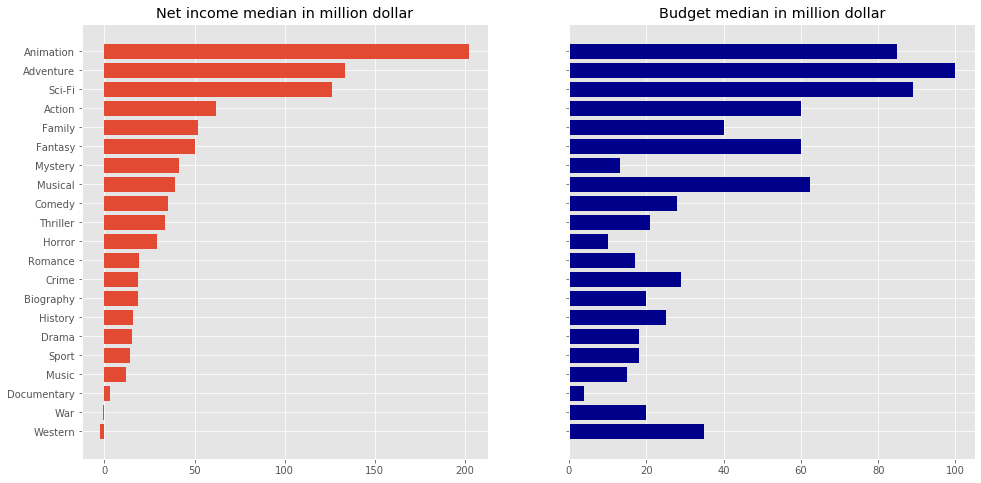

In [106]:
#bar chart on genres and budget information

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))

ax1.barh(describe_genres_df.genre, describe_genres_df.net_income_median)
ax2.barh(describe_genres_df.genre, describe_genres_df.production_budget_median, color='darkblue')

# Set a title for the presentation: 'Net income and budget by movie genres (2009-2018)'

ax1.set_title('Net income median in million dollar')
ax2.set_title('Budget median in million dollar')

plt.show()

<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Net income ratio median')

Text(0.5, 1.0, 'Budget median in million dollar')

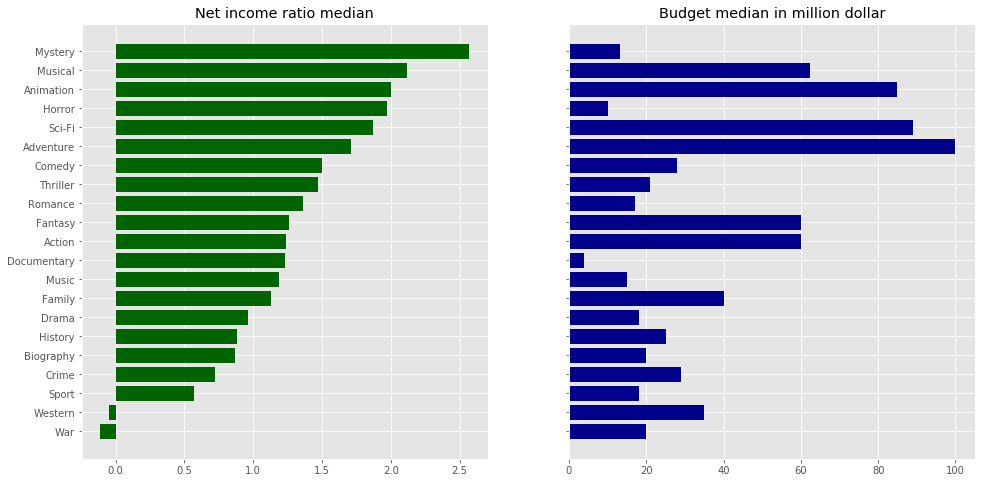

In [109]:
# sort values
describe_genres_df.sort_values(by='net_income_ratio_median', inplace=True, ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))

ax1.barh(describe_genres_df.genre, describe_genres_df.net_income_ratio_median, color= 'darkgreen')
ax2.barh(describe_genres_df.genre, describe_genres_df.production_budget_median, color='darkblue')

# Set a title for the presentation: 'Net income ratio and budget by movie genres (2009-2018)'

ax1.set_title('Net income ratio median')
ax2.set_title('Budget median in million dollar')

plt.show()